## https://www.kaggle.com/competitions/titanic/overview

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [84]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [85]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [86]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train_data.shape

(891, 12)

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Zmienna celu (zmienna zależna):
Zmienna celu, znana również jako zmienna zależna, to zmienna, którą chcesz przewidzieć lub wyjaśnić. Jest to wynik, który chcesz zrozumieć lub przewidzieć.

Przetrwał czy nie (0 nie przeżył, a 1 przeżył)

## Zmienne niezależne:
Zmienne niezależne, zwane także zmiennymi predykcyjnymi, to zmienne używane do wyjaśniania lub przewidywania zmiennej celu.

Stanowią one dane wejściowe do modelu predykcyjnego i zakłada się, że wpływają na zmienną celu lub mają z nią związek.

## Visualization Using Matplotlib

<BarContainer object of 2 artists>

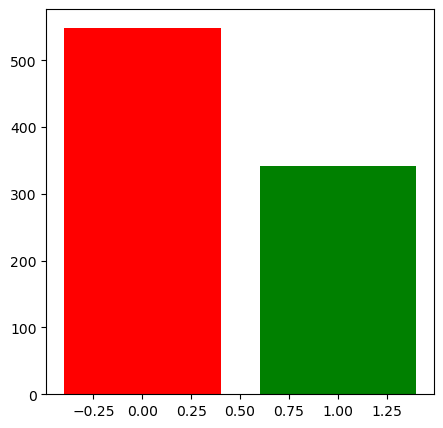

In [90]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Survived"].value_counts().keys()),list(train_data["Survived"].value_counts()),color=["r","g"])


## Pclass - Ticket class 1st , 2nd and 3rd

In [91]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

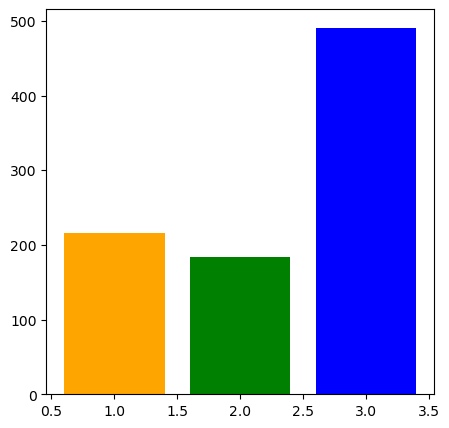

In [92]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Pclass"].value_counts().keys()),list(train_data["Pclass"].value_counts()),color=["blue","orange","green"])

plt.show()

In [93]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

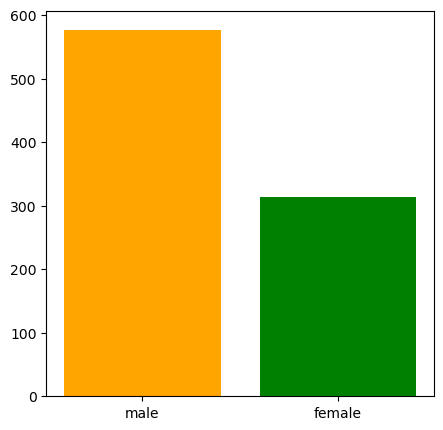

In [94]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Sex"].value_counts().keys()),list(train_data["Sex"].value_counts()),color=["orange","green"])

plt.show()

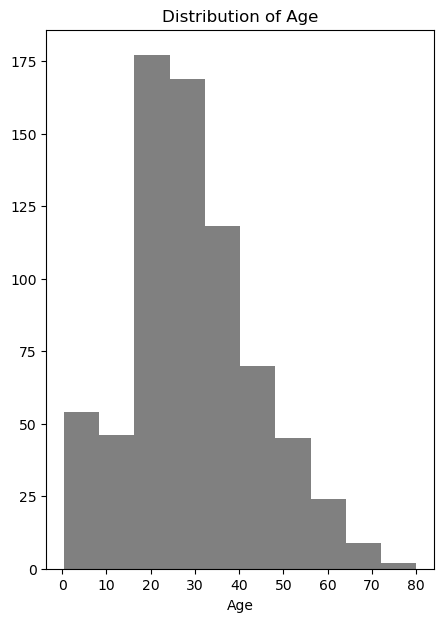

In [95]:
plt.figure(figsize=(5,7))
plt.hist(train_data["Age"],color="grey")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

## Data Visualization using Seaborn

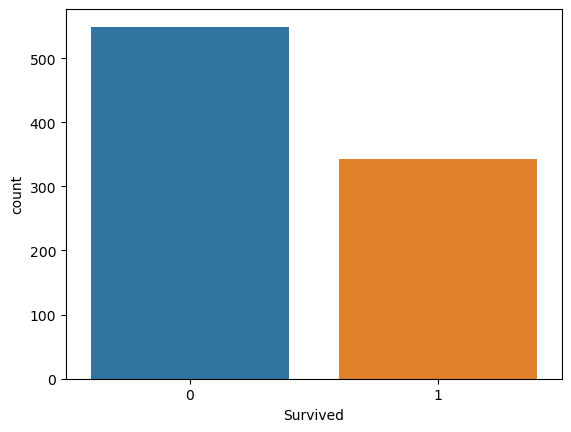

In [96]:
sns.countplot(x="Survived",data=train_data);

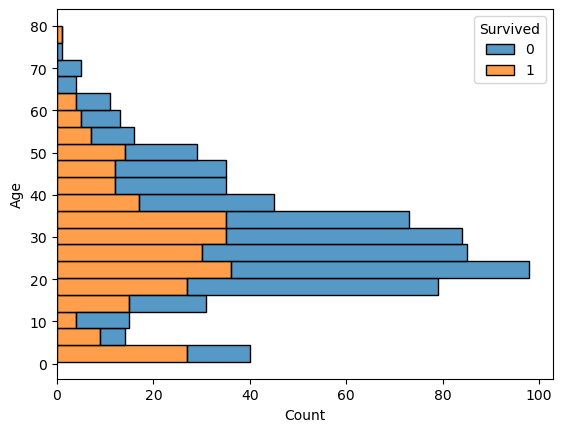

In [97]:
sns.histplot(y=train_data["Age"],hue=train_data["Survived"],multiple="stack");

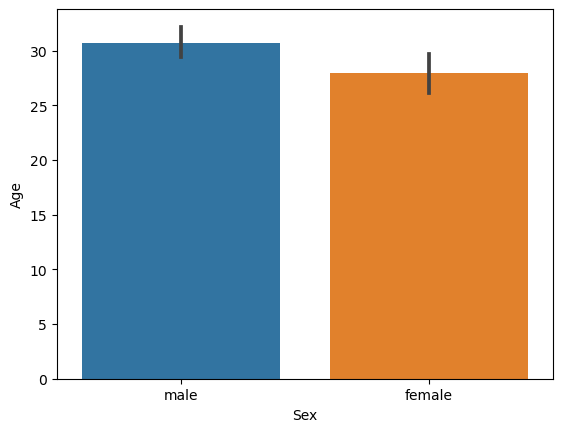

In [98]:
sns.barplot(x='Sex',y='Age',data=train_data);

#sns.barplot(x='category_variable', y='numeric_variable', data=data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

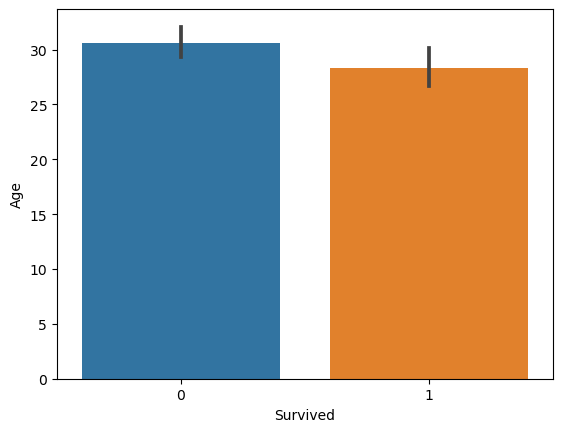

In [99]:

sns.barplot(x='Survived',y='Age',data=train_data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

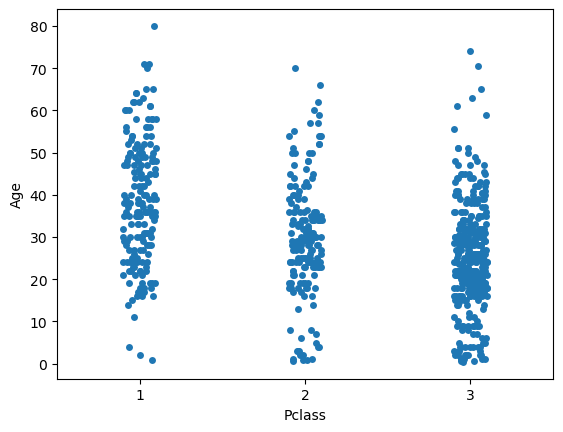

In [100]:
sns.stripplot(x='Pclass', y='Age', data=train_data)

In [101]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Preprocess the training data

In [102]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

## Preprocess the test data

In [103]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])

## Extract the first letter of the 'Cabin' column and encode it using one-hot encoding

In [104]:
train_data['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [105]:
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data = pd.get_dummies(train_data, columns=['Cabin'], dtype='int')

In [106]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0


In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    int32  
 8   Cabin_B   891 non-null    int32  
 9   Cabin_C   891 non-null    int32  
 10  Cabin_D   891 non-null    int32  
 11  Cabin_E   891 non-null    int32  
 12  Cabin_F   891 non-null    int32  
 13  Cabin_G   891 non-null    int32  
 14  Cabin_T   891 non-null    int32  
dtypes: float64(2), int32(9), int64(4)
memory usage: 73.2 KB


## Handling Missing values of Training Dataset

In [108]:
imputer = KNNImputer(n_neighbors=5)
train_data[['Age', 'Fare']] = imputer.fit_transform(train_data[['Age', 'Fare']])



## Handling Missing values of Test Dataset

In [109]:

test_data[['Age', 'Fare']] = imputer.fit_transform(test_data[['Age', 'Fare']])

## Align the columns in the test data with the training data

In [110]:
test_data['Cabin'] = test_data['Cabin'].str[0]
test_data = pd.get_dummies(test_data, columns=['Cabin'])
missing_columns = set(train_data.columns) - set(test_data.columns)
for column in missing_columns:
    test_data[column] = 0

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin_A   418 non-null    bool   
 7   Cabin_B   418 non-null    bool   
 8   Cabin_C   418 non-null    bool   
 9   Cabin_D   418 non-null    bool   
 10  Cabin_E   418 non-null    bool   
 11  Cabin_F   418 non-null    bool   
 12  Cabin_G   418 non-null    bool   
 13  Cabin_T   418 non-null    int64  
 14  Survived  418 non-null    int64  
dtypes: bool(7), float64(2), int32(1), int64(5)
memory usage: 27.5 KB


## Building Dependent and Independent variable

In [112]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

## Building model  (LogisticRegression)

## Scale the numerical features

In [113]:
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [115]:
model = LogisticRegression(max_iter=1000)

In [116]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predicting values on training data

In [117]:
y_train_pred = model.predict(X_train)

## Calculate accuracy on the training data

In [118]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.8114478114478114


## Predicting values on test data

In [119]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Survived
0,3,1,0.364165,0,0,-0.490783,False,False,False,False,False,False,False,0,0
1,3,0,1.300473,1,0,-0.507479,False,False,False,False,False,False,False,0,0
2,2,1,2.424042,0,0,-0.453367,False,False,False,False,False,False,False,0,0
3,3,1,-0.197619,0,0,-0.474005,False,False,False,False,False,False,False,0,0
4,3,0,-0.572142,1,1,-0.401017,False,False,False,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,-0.317467,0,0,-0.486337,False,False,False,False,False,False,False,0,0
414,1,0,0.701236,0,0,1.544246,False,False,True,False,False,False,False,0,0
415,3,1,0.663784,0,0,-0.502445,False,False,False,False,False,False,False,0,0
416,3,1,-0.317467,0,0,-0.486337,False,False,False,False,False,False,False,0,0


In [73]:
test_data.drop('Survived', axis=1, inplace=True)

In [74]:
predictions = model.predict(test_data)

In [79]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,3,1,0.364165,0,0,-0.490783,False,False,False,False,False,False,False,0
1,3,0,1.300473,1,0,-0.507479,False,False,False,False,False,False,False,0
2,2,1,2.424042,0,0,-0.453367,False,False,False,False,False,False,False,0
3,3,1,-0.197619,0,0,-0.474005,False,False,False,False,False,False,False,0
4,3,0,-0.572142,1,1,-0.401017,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,-0.317467,0,0,-0.486337,False,False,False,False,False,False,False,0
414,1,0,0.701236,0,0,1.544246,False,False,True,False,False,False,False,0
415,3,1,0.663784,0,0,-0.502445,False,False,False,False,False,False,False,0
416,3,1,-0.317467,0,0,-0.486337,False,False,False,False,False,False,False,0


In [123]:
passenger_ids = pd.read_csv('test.csv')['PassengerId']
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived Pred': predictions})

In [124]:
print(output)

     PassengerId  Survived Pred
0            892              0
1            893              1
2            894              0
3            895              0
4            896              1
..           ...            ...
413         1305              0
414         1306              1
415         1307              0
416         1308              0
417         1309              0

[418 rows x 2 columns]
